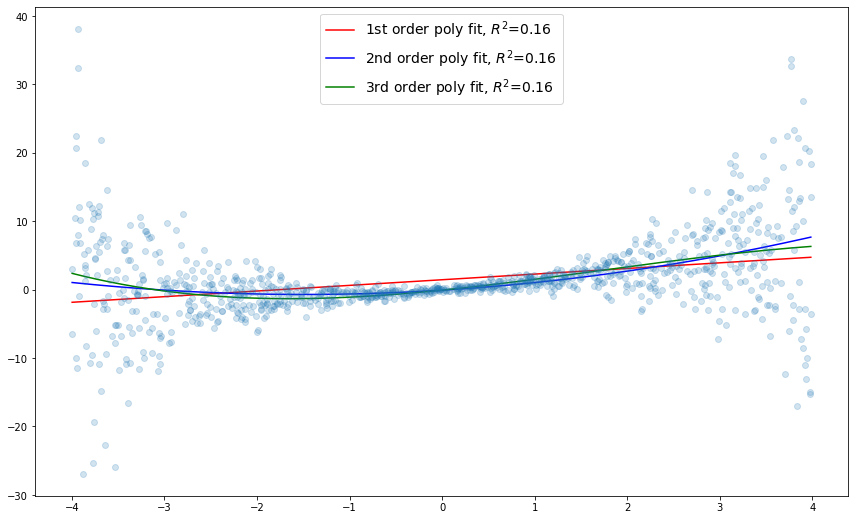

In [1]:
'''
QR example
Taken from: http://inversionlabs.com/2016/02/07/using-quantile-regression.html
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

np.random.seed(654123)

# generate a random dataset with heteroscedasticity
nobs = 1000
x = np.random.uniform(-4, 4, nobs)
y = x + 0.25 * x**2 + 0.1 * np.exp(1 + np.abs(x)) * np.random.randn(nobs)
 
df = pd.DataFrame({'predictor': x, 'response': y})

x1 = pd.DataFrame({'predictor': np.linspace(df.predictor.min(), df.predictor.max(), nobs)})

poly_1 = smf.ols(formula='response ~ 1 + predictor', data=df).fit()
poly_2 = smf.ols(formula='response ~ 1 + predictor + I(predictor ** 2.0)', data=df).fit()
poly_3 = smf.ols(formula='response ~ 1 + predictor + I(predictor ** 2.0) + I(predictor ** 3.0)', data=df).fit()

plt.figure(figsize=(9 * 1.618, 9))
plt.plot(x1.predictor, poly_1.predict(x1), 'r-', 
         label='1st order poly fit, $R^2$=%.2f' % poly_2.rsquared)
plt.plot(x1.predictor, poly_2.predict(x1), 'b-', 
         label='2nd order poly fit, $R^2$=%.2f' % poly_2.rsquared)
plt.plot(x1.predictor, poly_3.predict(x1), 'g-', 
         label='3rd order poly fit, $R^2$=%.2f' % poly_2.rsquared)

plt.plot(x, y, 'o', alpha=0.2)
plt.legend(loc="upper center", fontsize=14)



Text(0.5, 1.0, 'QUANTILE REGRESSION')

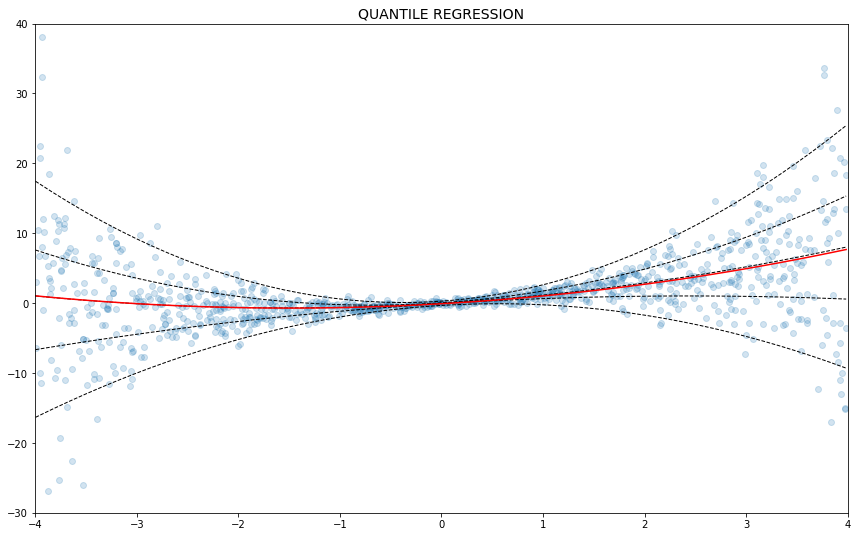

In [6]:
mod = smf.quantreg('response ~ predictor+ I(predictor ** 2.0)', df)

# Quantile regression for 5 quantiles

quantiles = [.05, .25, .50, .75, .95]

# get all result instances in a list
res_all = [mod.fit(q=q) for q in quantiles]

res_ols = smf.ols('response ~ predictor + I(predictor ** 2.0)', df).fit()


plt.figure(figsize=(9 * 1.618, 9))

# create x for prediction
x_p = np.linspace(df.predictor.min(), df.predictor.max(), 50)
df_p = pd.DataFrame({'predictor': x_p})

for qm, res in zip(quantiles, res_all):
    # get prediction for the model and plot
    # here we use a dict which works the same way as the df in ols
    plt.plot(x_p, res.predict({'predictor': x_p}), linestyle='--', lw=1, color='k')
    
y_ols_predicted = res_ols.predict(df_p)
plt.plot(x_p, y_ols_predicted, color='red', label='OLS')
plt.scatter(df.predictor, df.response, alpha=.2)
plt.xlim((-4, 4))
plt.ylim((-30, 40))
plt.title('QUANTILE REGRESSION', fontsize=14)